# Lab 3 - DTFT, FFT, and Their Applications
The goal of this lab is to visualize frequency domain analysis. We will next apply Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT) in three real-world applications, including feature extraction, image compression, and data denoising. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

## Task 1: Decompose Square Wave into Harmonic Components

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

def generate_square_wave(t_duration, freq, fs):
    """Generate a square wave with fundamental frequency freq of duration t_duration and sampling frequency fs

    Args:
        t_duration (float): Duration of square wave
        freq (int): Fundamental frequency of square wave
        fs (int): Sampling frequency

    Returns:
        square_wave (ndarray): Desired square wave (peak value: 1; peak-to-peak: 1)
    """
    t = np.linspace(0, t_duration, int(fs * t_duration), endpoint=False) # generate time array
    # your code below
    # We can first generate a sine function sin(2\pi*freq*t), and then apply sign function as sign(sin(2\pi*freq*t))
    
    square_wave = np.sign(np.sin(2 * np.pi * freq * t))
    return t, square_wave


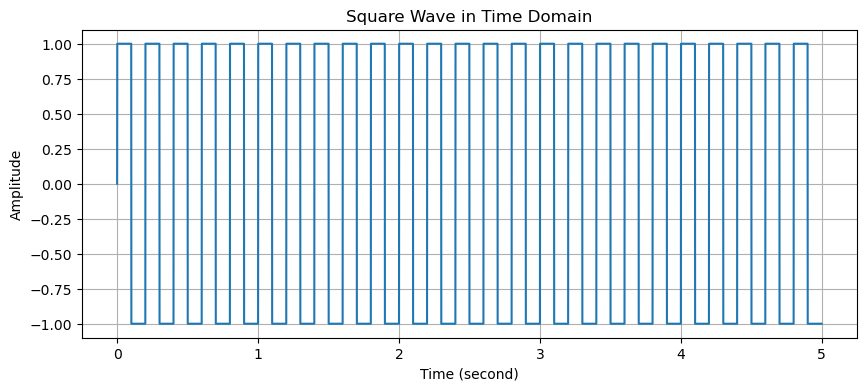

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
# Parameters for the square wave
sampling_rate = 1000  # Samples per second
duration = 5       # Duration of the signal in seconds
fundamental_freq = 5  # Frequency of the square wave in Hz

t, square_wave = generate_square_wave(duration, fundamental_freq, sampling_rate)

# visualize the square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave)
plt.title("Square Wave in Time Domain")
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


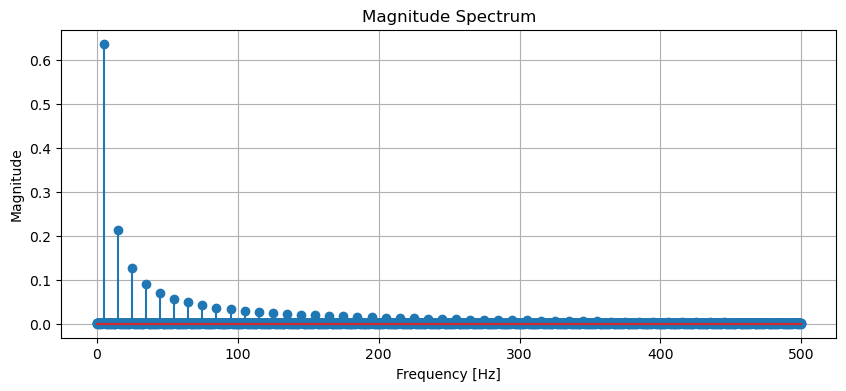

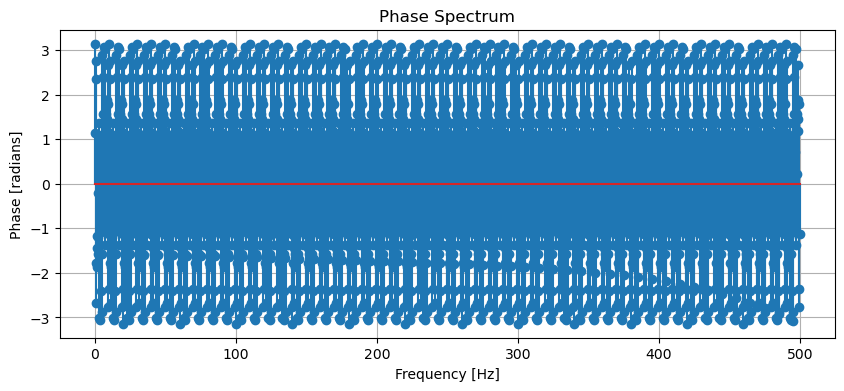

In [22]:

# Compute the DFT using numpy.fft.fft
N = len(square_wave)  # Number of samples
dft = np.fft.fft(square_wave)
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)  # Frequency axis

# Compute magnitude and phase
magnitude = np.abs(dft) / N  # Normalize by N
phase = np.angle(dft)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:N // 2], magnitude[:N // 2])  # Single-sided spectrum
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Plot the phase spectrum
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:N // 2], phase[:N // 2])  # Single-sided spectrum
plt.title("Phase Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid()
plt.show()

In [30]:

def reconstruct_wave(harmonics, t, frequencies):
    """_summary_

    Args:
        harmonics (ndarray): Set of frequencies of harmonic components to use
        t (ndarray): Time vector
        frequencies (ndarray): Frequency components

    Returns:
        reconstruction: Reconstructed signal using harmonic components
    """
    # initialize the recosntructed signal
    reconstruction = np.zeros_like(t, dtype=complex)
    
    for harmonic in harmonics:
        idx = np.argmin(np.abs(frequencies - harmonic))  # Find the index of the harmonic
        
        # Extract C (amplitude) and φ (phase) from the DFT coefficient
        C = np.abs(dft[idx] / N)
        phi = np.angle(dft[idx])
        f_k = frequencies[idx]
        
        # Reconstruct using: C * e^(j(2πf_k*t + φ))
        reconstruction += C * np.exp(1j * (2 * np.pi * f_k * t + phi))
        
    return reconstruction


c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


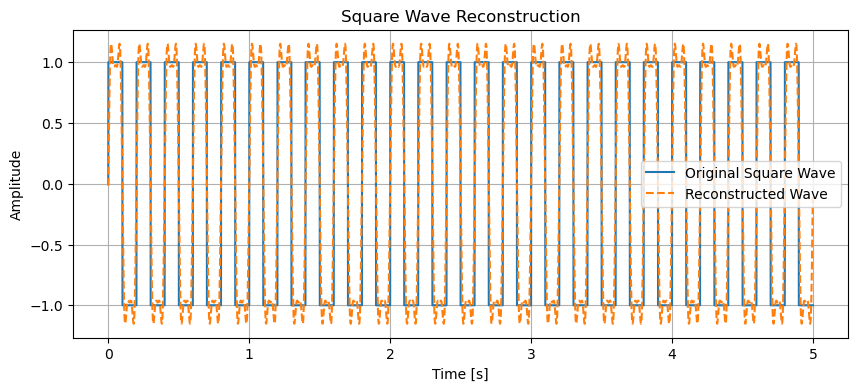

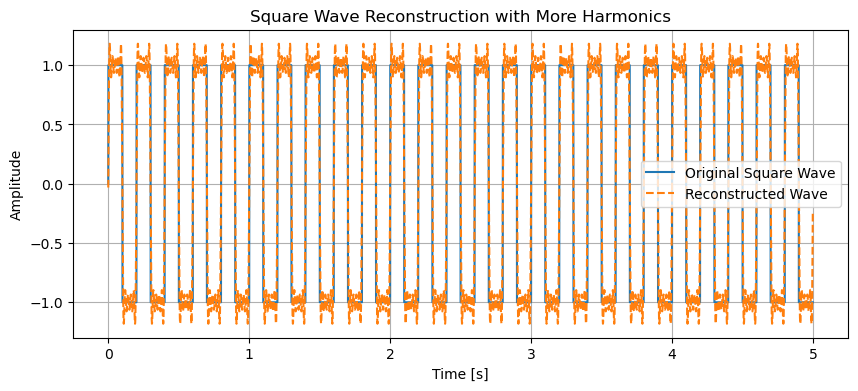

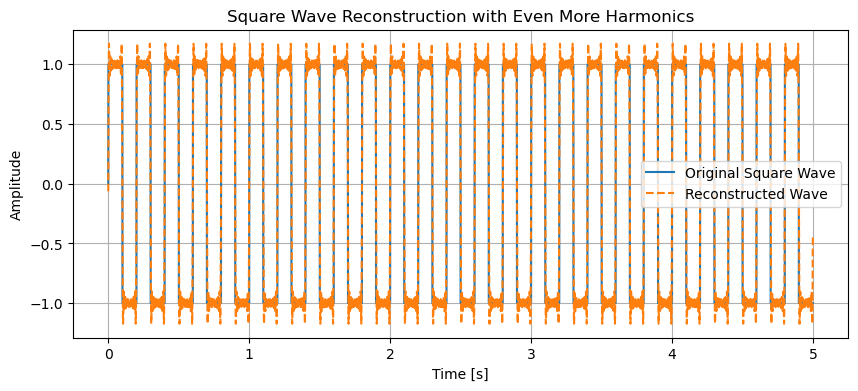

In [32]:

# call the reconstruct_wave to reconstruct the square wave
harmonics_to_use = np.array(list(range(-5, 5))) * fundamental_freq  
reconstructed_wave = reconstruct_wave(harmonics_to_use, t, frequencies)

# Plot the original and reconstructed square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave, label="Original Square Wave")
plt.plot(t, reconstructed_wave, label="Reconstructed Wave", linestyle="--")
plt.title("Square Wave Reconstruction")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

harmonics_to_use = np.array(list(range(-10, 10))) * fundamental_freq
reconstructed_wave = reconstruct_wave(harmonics_to_use, t, frequencies)

# Plot the original and reconstructed square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave, label="Original Square Wave")
plt.plot(t, reconstructed_wave, label="Reconstructed Wave", linestyle="--")
plt.title("Square Wave Reconstruction with More Harmonics")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

harmonics_to_use = np.array(list(range(-20, 20))) * fundamental_freq
reconstructed_wave = reconstruct_wave(harmonics_to_use, t, frequencies)

# Plot the original and reconstructed square wave
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave, label="Original Square Wave")
plt.plot(t, reconstructed_wave, label="Reconstructed Wave", linestyle="--")
plt.title("Square Wave Reconstruction with Even More Harmonics")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


### Discussion:
As the harmonic range increases from (-5, 5) to (-10, 10) to (-20, 20), the reconstructed square wave becomes progressively more accurate. With fewer harmonics, the wave appears rounded and sinusoidal with significant ringing at the edges (Gibbs phenomenon). As more harmonics are included, the transitions become sharper, the plateaus flatten, and the overall shape better approximates an ideal square wave. This demonstrates that square waves require many high-frequency harmonic components to accurately reproduce their sharp discontinuities, as each additional harmonic contributes finer details to the reconstruction.

## Task 2: Image Compression using FFT 

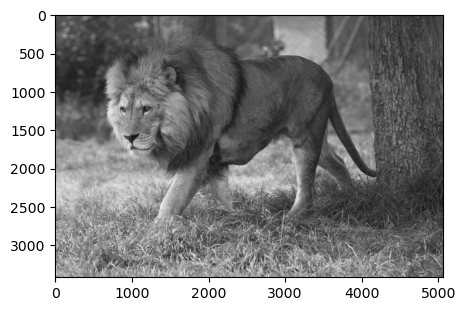

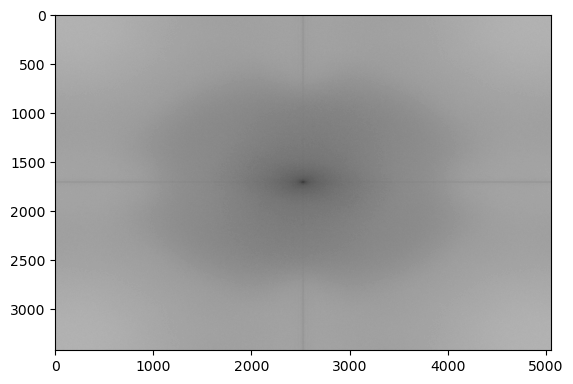

In [7]:
# Load and display image
img = Image.open("lion.jpg").convert('L')
img = np.array(img)
_ = plt.figure(figsize=(5, 5))
_ = plt.imshow(img, cmap ='gray', vmin=0, vmax=255)

img_fft = np.fft.fft2(img)  # Perform FFT on the image
img_fft_log = np.log(np.abs(np.fft.fftshift(img_fft)) + 1)  # Convert FFt to log scale
# Visualize FFT
plt.figure()
_ = plt.imshow(256 - img_fft_log, cmap='gray')

In [8]:
def compress_img(img_fft, ratio):
    """Compress an image by keeping a specified percentage of FFT components

    Args:
        img_fft (ndarray): FFT of image
        ratio (float): The ratio of FFT components to keep
    """
    # your code goes below
    img_fft_sort = np.sort(np.abs(img_fft).flatten())  # Sort img_fft by magnitude
    thresh = img_fft_sort[int(len(img_fft_sort) * (1 - ratio))]  # Compute threshold of magnitude
    ind = np.abs(img_fft) > thresh  # Find indices of components that are larger than threshold
    fft_keep = img_fft * ind  # Zero out components with small magnitudes
    compressed_img = np.abs(np.fft.ifft2(fft_keep))  # Use inverse FFT
    _ = plt.imshow(256 - compressed_img, cmap='gray')  # Show reconstructed image
    plt.title(f"Compressed Image with {ratio * 100:.1f}% Components Kept", fontsize=12)

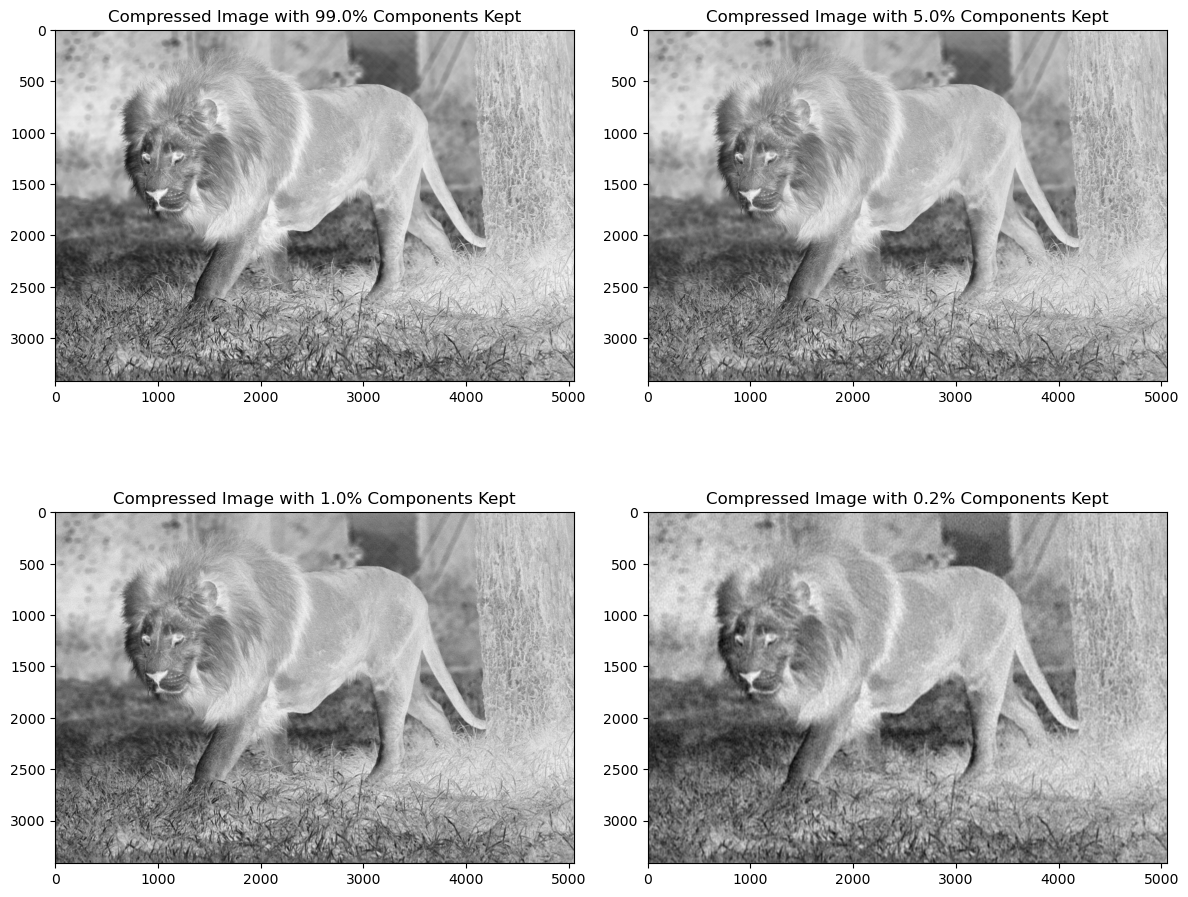

In [9]:
# call compress_img with ratio = 0.99, 0.05, 0.01, 0.002
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
compress_img(img_fft, 0.99)

plt.subplot(2, 2, 2)
compress_img(img_fft, 0.05)

plt.subplot(2, 2, 3)
compress_img(img_fft, 0.01)

plt.subplot(2, 2, 4)
compress_img(img_fft, 0.002)

plt.tight_layout()
plt.show()

### Discussion

The FFT enables significant data compression by retaining only the most important frequency components while discarding low-power components that contribute minimally to image quality. As demonstrated in the image compression results, keeping 99% of components produces a nearly identical image to the original, while keeping only 5% of components still preserves the main features of the lion with acceptable quality. At 1% compression, the image remains recognizable though with noticeable detail loss, and even at 0.2% (500:1 compression ratio), the basic structure is still visible. This frequency-domain compression dramatically reduces storage and transmission costs—for example, transmitting only 1% of components requires 99% less bandwidth than sending the full image, making FFT-based compression invaluable for applications like video streaming, satellite imagery, and medical imaging where data volumes are massive but many frequency components carry negligible information.

###

## Task 3: Denoising a Signal using FFT

In [10]:

def generate_sine(duration, frequency, sample_rate):
    """Generates samples of a sine wave.

    Samples are generated according to following equation:

        y(t) = A sin(2*pi*f*t)

    Args:
        frequency: The frequency of the note.
        duration: The length of the note in seconds.
        amplitude: The amplitude of the note.
        sample_rate: The sample rate.

    Returns:
        An array of samples.
    """
    # Enter code here
    num_samples = int(duration * sample_rate)
    t = np.linspace(0, duration, num_samples)
    sine_wave = np.sin(2*np.pi*frequency*t)
    return sine_wave

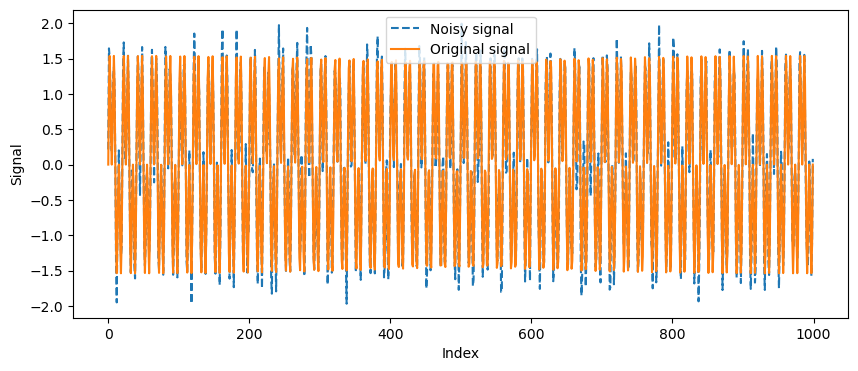

In [18]:
# call generate_sine to generate function g and the noisy signal
# your code here
g = generate_sine(duration=1.0, frequency=50, sample_rate=1000) + generate_sine(duration=1.0, frequency=150, sample_rate=1000)
noise = np.random.normal(0, 0.2, len(g))
noisy_signal = g + noise

plt.figure(figsize=(10, 4))
_ = plt.plot(range(len(noisy_signal)), noisy_signal, label="Noisy signal", linestyle="--")
_ = plt.plot(range(len(g)), g, label="Original signal")
plt.xlabel("Index")
plt.ylabel("Signal")
plt.legend()
plt.show()

In [15]:

def filter_with_psd(signal, sampling_rate, threshold_ratio):
    """
    Filters a signal based on its Power Spectral Density (PSD)

    Args:
        signal (ndarray): The input time-domain signal.
        sampling_rate (float): The sampling rate of the signal (Hz).
        threshold_ratio (float): Fraction of the PSD to retain (e.g., 0.1 for top 10%).

    Returns:
        filtered_signal (ndarray): The filtered signal in the time domain.
    """
    # your code goes below
    # Compute the FFT of the signal
    fft_signal = np.fft.fft(signal)
    # Compute the Power Spectral Density (PSD)
    psd = np.abs(fft_signal) ** 2

    # Sort the PSD to find the threshold
    sorted_psd = np.sort(psd)[::-1]  # Sort in descending order

    # Create a mask to retain frequencies with PSD above the threshold
    threshold = sorted_psd[int(len(sorted_psd) * threshold_ratio)]
    mask = psd >= threshold
    # Apply the mask to the FFT signal
    filtered_fft = fft_signal * mask

    # Reconstruct the signal using the inverse FFT
    filtered_signal = np.fft.ifft(filtered_fft)

    # Compute the mean squared error between the original and filtered signals
    error = np.mean((signal - filtered_signal) ** 2)
    print(error)

    # Plot original and filtered signals for comparison
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(signal, label='Original Signal')
    plt.title('Original Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(filtered_signal, label='Filtered Signal', color='orange')
    plt.title('Filtered Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return filtered_signal


(0.029338943652141118-3.226585665316861e-19j)


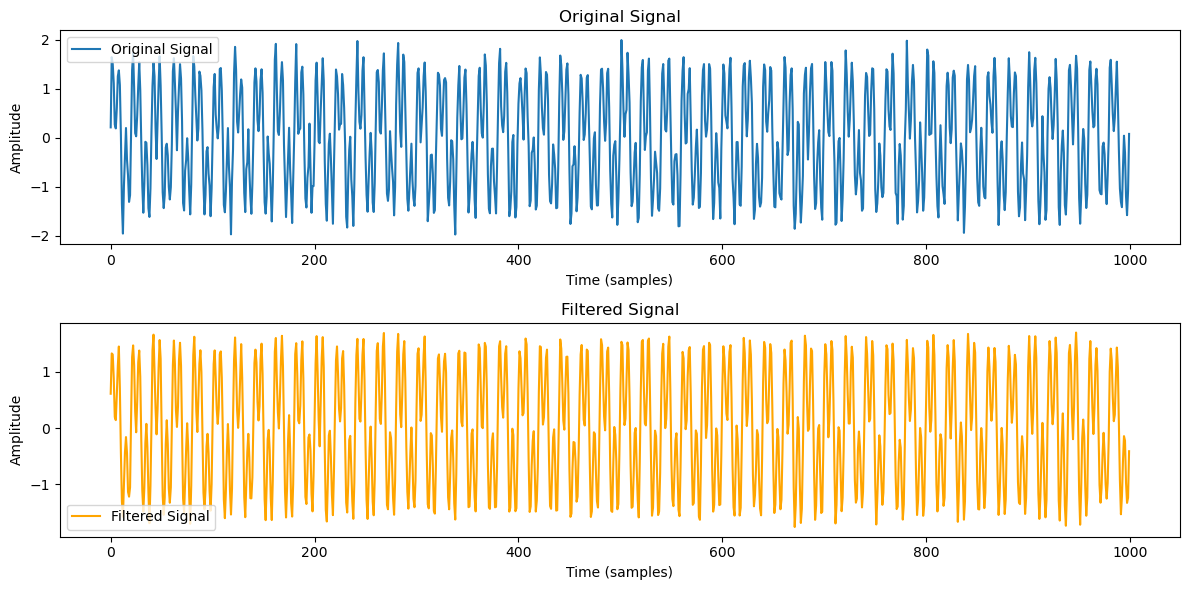

(0.02065802915684151-1.3530843112619095e-19j)


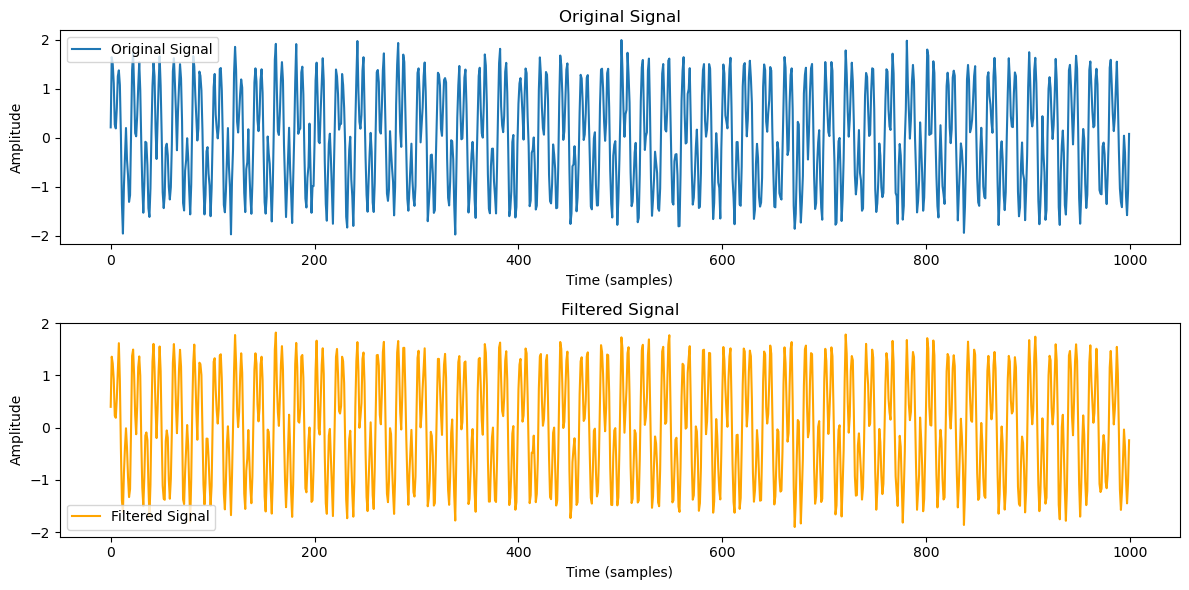

(0.014573185373491252-6.036837696399289e-19j)


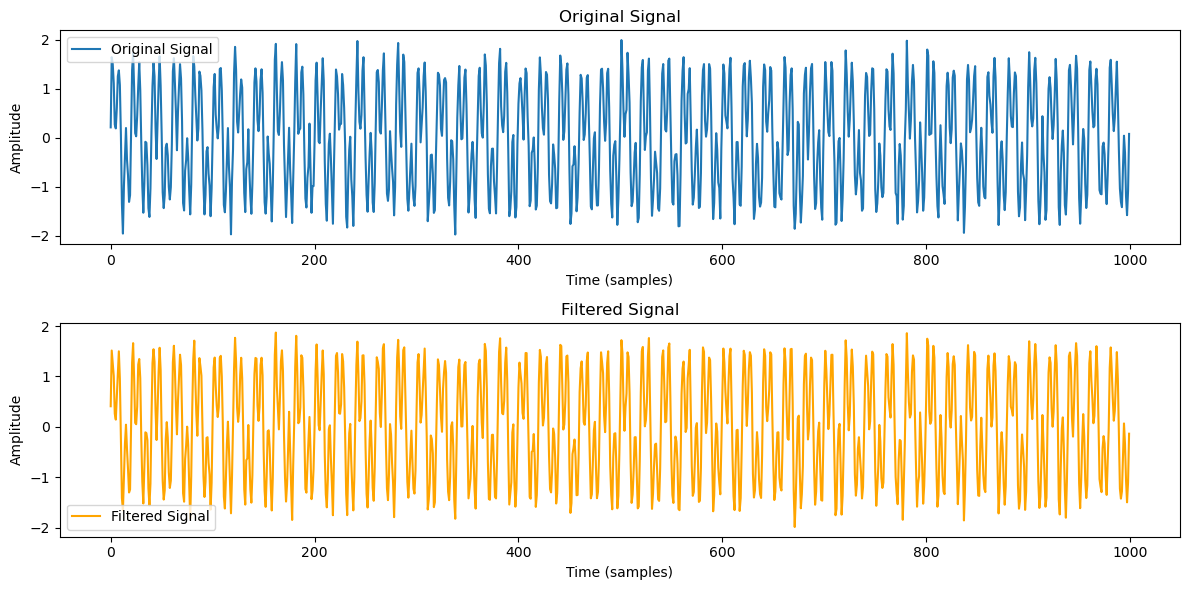

In [20]:
# call filter_with_psd with different threshold ratio and compare the filtering effect
filtered_signal_10 = filter_with_psd(noisy_signal, sampling_rate, threshold_ratio=0.1)
filtered_signal_20 = filter_with_psd(noisy_signal, sampling_rate, threshold_ratio=0.2)
filtered_signal_30 = filter_with_psd(noisy_signal, sampling_rate, threshold_ratio=0.3)

### Discussion

The threshold_ratio parameter controls how much of the signal's frequency content is retained during filtering, directly impacting the trade-off between noise reduction and signal preservation. With a lower threshold_ratio (0.1), only the top 10% of frequency components with the highest power are kept, resulting in aggressive filtering that removes most noise but may also eliminate some legitimate signal details, producing the smoothest but potentially over-filtered output. At a moderate threshold_ratio (0.2), 20% of components are retained, providing a balanced approach that removes significant noise while preserving more signal features, typically yielding better reconstruction quality. With a higher threshold_ratio (0.3), 30% of components are kept, resulting in less aggressive filtering that retains more fine details and higher-frequency signal content but also allows more noise to remain in the reconstructed signal.